In [75]:
import pandas as pd
import mysql.connector as mysqlConnector
import matplotlib.pyplot as plt
import plotly.express as px

IMPORTATION DE MES DONNEES

In [49]:
data = pd.read_csv('valeursfoncieres-2022.txt', sep="|")
data

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_22980\3257549022.py:1: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('valeursfoncieres-2022.txt', sep="|")


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/11/2022,Adjudication,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
4617586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/11/2022,Adjudication,...,NaN,2,2.0,Appartement,NaN,210.0,6.0,NaN,NaN,NaN
4617587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/11/2022,Adjudication,...,NaN,2,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
4617588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,14/12/2022,Vente,...,NaN,2,2.0,Appartement,NaN,24.0,2.0,NaN,NaN,NaN


EXPLORATION ET NETTOYAGE

In [3]:
colonnes_a_supprimer = ["Identifiant de document", "Reference document", "1 Articles CGI", "2 Articles CGI", "3 Articles CGI", "4 Articles CGI", "5 Articles CGI","B/T/Q","Identifiant local","Prefixe de section","No disposition","No Volume","Nature culture","Nature culture speciale","Code type local","No plan","2eme lot","3eme lot","4eme lot","5eme lot","1er lot"]
data.drop(columns=colonnes_a_supprimer, inplace=True)

In [4]:
data

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,...,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,03/01/2022,Vente,"55000,00",13.0,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,1,...,"24,10",NaN,NaN,NaN,NaN,1,Appartement,24.0,1.0,NaN
1,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,84.0
2,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,88.0
3,03/01/2022,Vente,"143000,00",98.0,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,1,...,"123,23",NaN,NaN,NaN,NaN,1,Appartement,140.0,3.0,NaN
4,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,10/11/2022,Adjudication,"188100,00",2.0,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,...,NaN,NaN,NaN,NaN,NaN,1,Dépendance,0.0,0.0,NaN
4617586,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,...,NaN,NaN,NaN,NaN,NaN,2,Appartement,210.0,6.0,NaN
4617587,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,...,NaN,NaN,NaN,NaN,NaN,2,Dépendance,0.0,0.0,NaN
4617588,14/12/2022,Vente,"111000,00",18.0,RUE,6221,MAYET,75006.0,PARIS 06,75,...,NaN,NaN,NaN,NaN,NaN,2,Appartement,24.0,2.0,NaN


In [5]:
data.isna().sum()

Date mutation                       0
Nature mutation                     0
Valeur fonciere                 31142
No voie                       1651541
Type de voie                  1765995
Code voie                       38521
Voie                            38675
Code postal                     38707
Commune                             0
Code departement                    0
Code commune                        0
Section                           158
Surface Carrez du 1er lot     4198313
Surface Carrez du 2eme lot    4475948
Surface Carrez du 3eme lot    4601600
Surface Carrez du 4eme lot    4613682
Surface Carrez du 5eme lot    4616138
Nombre de lots                      0
Type local                    1876728
Surface reelle bati           1879382
Nombre pieces principales     1879382
Surface terrain               1518391
dtype: int64

In [6]:
rows_with_nan = data[data['Valeur fonciere'].isna()]
rows_with_nan

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,...,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
229,10/01/2022,Vente,NaN,NaN,NaN,B002,CAZAN,1090.0,GENOUILLEUX,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1055.0
230,10/01/2022,Vente,NaN,NaN,NaN,B002,CAZAN,1090.0,GENOUILLEUX,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,179.0
231,10/01/2022,Vente,NaN,NaN,NaN,B002,CAZAN,1090.0,GENOUILLEUX,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,113.0
1476,25/01/2022,Vente,NaN,NaN,NaN,B088,GRANDE PIECE,1430.0,VIEU-D IZENAVE,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,7537.0
1945,26/01/2022,Vente,NaN,NaN,NaN,B024,LES ENTREMONTS,1120.0,DAGNEUX,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4610096,10/03/2022,Adjudication,NaN,99.0,RUE,8955,DE SEVRES,75006.0,PARIS 06,75,...,NaN,NaN,NaN,NaN,NaN,2,Dépendance,0.0,0.0,NaN
4610097,10/03/2022,Adjudication,NaN,99.0,RUE,8955,DE SEVRES,75006.0,PARIS 06,75,...,NaN,NaN,NaN,NaN,NaN,2,Appartement,94.0,3.0,NaN
4610098,10/03/2022,Adjudication,NaN,99.0,RUE,8955,DE SEVRES,75006.0,PARIS 06,75,...,NaN,NaN,NaN,NaN,NaN,1,Dépendance,0.0,0.0,NaN
4611104,04/11/2022,Vente,NaN,11.0,RUE,1065,BOIS DE BOULOGNE,75016.0,PARIS 16,75,...,NaN,NaN,NaN,NaN,NaN,2,Appartement,115.0,3.0,NaN


In [7]:
data.isna().sum()

Date mutation                       0
Nature mutation                     0
Valeur fonciere                 31142
No voie                       1651541
Type de voie                  1765995
Code voie                       38521
Voie                            38675
Code postal                     38707
Commune                             0
Code departement                    0
Code commune                        0
Section                           158
Surface Carrez du 1er lot     4198313
Surface Carrez du 2eme lot    4475948
Surface Carrez du 3eme lot    4601600
Surface Carrez du 4eme lot    4613682
Surface Carrez du 5eme lot    4616138
Nombre de lots                      0
Type local                    1876728
Surface reelle bati           1879382
Nombre pieces principales     1879382
Surface terrain               1518391
dtype: int64

In [8]:
colonnes_a_traiter = ['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot',"Surface Carrez du 4eme lot","Surface Carrez du 5eme lot","Surface reelle bati","Nombre pieces principales","Surface terrain"]
for colonne in colonnes_a_traiter:
    data[colonne] = data[colonne].fillna(0)

In [9]:
data.isna().sum()

Date mutation                       0
Nature mutation                     0
Valeur fonciere                 31142
No voie                       1651541
Type de voie                  1765995
Code voie                       38521
Voie                            38675
Code postal                     38707
Commune                             0
Code departement                    0
Code commune                        0
Section                           158
Surface Carrez du 1er lot           0
Surface Carrez du 2eme lot          0
Surface Carrez du 3eme lot          0
Surface Carrez du 4eme lot          0
Surface Carrez du 5eme lot          0
Nombre de lots                      0
Type local                    1876728
Surface reelle bati                 0
Nombre pieces principales           0
Surface terrain                     0
dtype: int64

In [10]:
data

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,...,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,03/01/2022,Vente,"55000,00",13.0,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,1,...,"24,10",0,0,0,0,1,Appartement,24.0,1.0,0.0
1,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,...,0,0,0,0,0,0,NaN,0.0,0.0,84.0
2,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,...,0,0,0,0,0,0,NaN,0.0,0.0,88.0
3,03/01/2022,Vente,"143000,00",98.0,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,1,...,"123,23",0,0,0,0,1,Appartement,140.0,3.0,0.0
4,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,1,...,0,0,0,0,0,0,NaN,0.0,0.0,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,10/11/2022,Adjudication,"188100,00",2.0,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,...,0,0,0,0,0,1,Dépendance,0.0,0.0,0.0
4617586,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,...,0,0,0,0,0,2,Appartement,210.0,6.0,0.0
4617587,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,...,0,0,0,0,0,2,Dépendance,0.0,0.0,0.0
4617588,14/12/2022,Vente,"111000,00",18.0,RUE,6221,MAYET,75006.0,PARIS 06,75,...,0,0,0,0,0,2,Appartement,24.0,2.0,0.0


In [11]:
rows_with_nan = data[data['Code postal'].isna()]
rows_with_nan.head(50)

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,...,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
481,06/01/2022,Vente en l'état futur d'achèvement,"291600,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,0,0,0,0,0,1,NaN,0.0,0.0,0.0
483,10/01/2022,Vente en l'état futur d'achèvement,"369900,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,0,0,0,0,0,1,NaN,0.0,0.0,0.0
485,06/01/2022,Vente en l'état futur d'achèvement,"274000,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,0,0,0,0,0,1,NaN,0.0,0.0,0.0
906,14/01/2022,Vente en l'état futur d'achèvement,"384600,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,0,0,0,0,0,1,NaN,0.0,0.0,0.0
1414,21/01/2022,Vente en l'état futur d'achèvement,"407400,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,0,0,0,0,0,1,NaN,0.0,0.0,0.0
1416,21/01/2022,Vente en l'état futur d'achèvement,"192200,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,"31,87",0,0,0,0,1,NaN,0.0,0.0,0.0
1822,28/01/2022,Vente,"235200,00",NaN,NaN,NaN,NaN,NaN,AMBERIEUX-EN-DOMBES,1,...,0,0,0,0,0,0,NaN,0.0,0.0,0.0
4241,11/02/2022,Vente en l'état futur d'achèvement,"314600,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,"53,83",0,0,0,0,1,NaN,0.0,0.0,0.0
5128,25/02/2022,Vente en l'état futur d'achèvement,"225000,00",NaN,NaN,NaN,NaN,NaN,LEYMENT,1,...,0,0,0,0,0,1,NaN,0.0,0.0,0.0
5572,19/02/2022,Vente en l'état futur d'achèvement,"362600,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,0,0,0,0,0,1,NaN,0.0,0.0,0.0


In [12]:
colonnes_a_verifier = ['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot','Surface Carrez du 4eme lot','Surface Carrez du 5eme lot','Surface reelle bati','Surface terrain']
ligne_a_supprimer = data[(data[colonnes_a_verifier] == 0).all(axis=1)]
data = data.drop(ligne_a_supprimer.index)
rows_with_nan = data[data['Code postal'].isna()]
rows_with_nan.head(60)

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,...,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
1416,21/01/2022,Vente en l'état futur d'achèvement,"192200,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,"31,87",0,0,0,0,1,NaN,0.0,0.0,0.0
4241,11/02/2022,Vente en l'état futur d'achèvement,"314600,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,"53,83",0,0,0,0,1,NaN,0.0,0.0,0.0
8951,18/03/2022,Vente en l'état futur d'achèvement,"302400,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,"54,88",0,0,0,0,1,NaN,0.0,0.0,0.0
15223,12/05/2022,Vente en l'état futur d'achèvement,"490000,00",NaN,NaN,NaN,NaN,NaN,DIVONNE-LES-BAINS,1,...,"77,11",0,0,0,0,1,NaN,0.0,0.0,0.0
16122,03/05/2022,Vente en l'état futur d'achèvement,"279792,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,"80,81",0,0,0,0,1,NaN,0.0,0.0,0.0
24092,07/07/2022,Vente en l'état futur d'achèvement,"380400,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,"68,25",0,0,0,0,1,NaN,0.0,0.0,0.0
28388,22/07/2022,Vente en l'état futur d'achèvement,"384200,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,"69,00",0,0,0,0,1,NaN,0.0,0.0,0.0
32040,06/09/2022,Vente en l'état futur d'achèvement,"700000,00",NaN,NaN,NaN,NaN,NaN,DIVONNE-LES-BAINS,1,...,"103,14",0,0,0,0,1,NaN,0.0,0.0,0.0
32081,05/09/2022,Vente en l'état futur d'achèvement,"475200,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,"87,41",0,0,0,0,1,NaN,0.0,0.0,0.0
34985,22/09/2022,Vente en l'état futur d'achèvement,"371000,00",NaN,NaN,NaN,NaN,NaN,ST-GENIS-POUILLY,1,...,"69,72",0,0,0,0,1,NaN,0.0,0.0,0.0


In [13]:
data = data.dropna(subset=['Valeur fonciere'])

In [14]:
data.isna().sum()

Date mutation                       0
Nature mutation                     0
Valeur fonciere                     0
No voie                       1491893
Type de voie                  1637455
Code voie                        1988
Voie                             2114
Code postal                      2098
Commune                             0
Code departement                    0
Code commune                        0
Section                            90
Surface Carrez du 1er lot           0
Surface Carrez du 2eme lot          0
Surface Carrez du 3eme lot          0
Surface Carrez du 4eme lot          0
Surface Carrez du 5eme lot          0
Nombre de lots                      0
Type local                    1612427
Surface reelle bati                 0
Nombre pieces principales           0
Surface terrain                     0
dtype: int64

In [15]:
lignes_paris = data[(data['Commune'].str.startswith('Paris')) & (data['Code postal'].isna())]
lignes_paris

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,...,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain


In [16]:
data = data.rename(columns=lambda x: x.replace(' ', '_'))
data.columns

Index(['Date_mutation', 'Nature_mutation', 'Valeur_fonciere', 'No_voie',
       'Type_de_voie', 'Code_voie', 'Voie', 'Code_postal', 'Commune',
       'Code_departement', 'Code_commune', 'Section',
       'Surface_Carrez_du_1er_lot', 'Surface_Carrez_du_2eme_lot',
       'Surface_Carrez_du_3eme_lot', 'Surface_Carrez_du_4eme_lot',
       'Surface_Carrez_du_5eme_lot', 'Nombre_de_lots', 'Type_local',
       'Surface_reelle_bati', 'Nombre_pieces_principales', 'Surface_terrain'],
      dtype='object')

In [17]:
data

,Date_mutation,Nature_mutation,Valeur_fonciere,No_voie,Type_de_voie,Code_voie,Voie,Code_postal,Commune,Code_departement,...,Surface_Carrez_du_1er_lot,Surface_Carrez_du_2eme_lot,Surface_Carrez_du_3eme_lot,Surface_Carrez_du_4eme_lot,Surface_Carrez_du_5eme_lot,Nombre_de_lots,Type_local,Surface_reelle_bati,Nombre_pieces_principales,Surface_terrain
0,03/01/2022,Vente,"55000,00",13.0,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,1,...,"24,10",0,0,0,0,1,Appartement,24.0,1.0,0.0
1,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,...,0,0,0,0,0,0,NaN,0.0,0.0,84.0
2,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,...,0,0,0,0,0,0,NaN,0.0,0.0,88.0
3,03/01/2022,Vente,"143000,00",98.0,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,1,...,"123,23",0,0,0,0,1,Appartement,140.0,3.0,0.0
4,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,1,...,0,0,0,0,0,0,NaN,0.0,0.0,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617578,22/03/2022,Vente,"232650,00",109.0,AV,4754,D ITALIE,75013.0,PARIS 13,75,...,0,0,0,0,0,1,Appartement,49.0,2.0,0.0
4617581,20/10/2022,Adjudication,"830000,00",104.0,RUE,6324,MICHEL ANGE,75016.0,PARIS 16,75,...,0,0,0,0,0,2,Appartement,100.0,3.0,0.0
4617582,01/12/2022,Adjudication,"310000,00",79.0,RUE,2300,DE LA CONVENTION,75015.0,PARIS 15,75,...,0,0,0,0,0,2,Appartement,41.0,2.0,0.0
4617586,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,...,0,0,0,0,0,2,Appartement,210.0,6.0,0.0


MISE EN PLACE DE MES INDEX ET SCINDAGE DE MA TABLE PRINCIPALE EN 5 TABLES

In [18]:
data['bien_id'] = range(len(data))
data.set_index('bien_id', inplace=True)
data

,Date_mutation,Nature_mutation,Valeur_fonciere,No_voie,Type_de_voie,Code_voie,Voie,Code_postal,Commune,Code_departement,...,Surface_Carrez_du_1er_lot,Surface_Carrez_du_2eme_lot,Surface_Carrez_du_3eme_lot,Surface_Carrez_du_4eme_lot,Surface_Carrez_du_5eme_lot,Nombre_de_lots,Type_local,Surface_reelle_bati,Nombre_pieces_principales,Surface_terrain
bien_id,,,,,,,,,,,,,,,,,,,,,
0,03/01/2022,Vente,"55000,00",13.0,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,1,...,"24,10",0,0,0,0,1,Appartement,24.0,1.0,0.0
1,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,...,0,0,0,0,0,0,NaN,0.0,0.0,84.0
2,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,...,0,0,0,0,0,0,NaN,0.0,0.0,88.0
3,03/01/2022,Vente,"143000,00",98.0,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,1,...,"123,23",0,0,0,0,1,Appartement,140.0,3.0,0.0
4,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,1,...,0,0,0,0,0,0,NaN,0.0,0.0,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873074,22/03/2022,Vente,"232650,00",109.0,AV,4754,D ITALIE,75013.0,PARIS 13,75,...,0,0,0,0,0,1,Appartement,49.0,2.0,0.0
3873075,20/10/2022,Adjudication,"830000,00",104.0,RUE,6324,MICHEL ANGE,75016.0,PARIS 16,75,...,0,0,0,0,0,2,Appartement,100.0,3.0,0.0
3873076,01/12/2022,Adjudication,"310000,00",79.0,RUE,2300,DE LA CONVENTION,75015.0,PARIS 15,75,...,0,0,0,0,0,2,Appartement,41.0,2.0,0.0


In [19]:
transaction = ['Date_mutation', 'Nature_mutation','Valeur_fonciere']
data_transac = data[transaction].copy()
data_transac

,Date_mutation,Nature_mutation,Valeur_fonciere
bien_id,,,
0,03/01/2022,Vente,"55000,00"
1,03/01/2022,Vente,"143000,00"
2,03/01/2022,Vente,"143000,00"
3,03/01/2022,Vente,"143000,00"
4,04/01/2022,Vente,"300,00"
...,...,...,...
3873074,22/03/2022,Vente,"232650,00"
3873075,20/10/2022,Adjudication,"830000,00"
3873076,01/12/2022,Adjudication,"310000,00"


In [20]:
adresse = ['No_voie', 'Type_de_voie','Code_voie','Voie','Code_postal']
data_adresse = data[adresse].copy()
data_adresse

,No_voie,Type_de_voie,Code_voie,Voie,Code_postal
bien_id,,,,,
0,13.0,RUE,2280,DE LA LIBERTE,1000.0
1,NaN,NaN,B010,CHAMP COCHET,1480.0
2,NaN,NaN,B010,CHAMP COCHET,1480.0
3,98.0,RTE,0055,DE LA DOMBES,1480.0
4,NaN,NaN,B031,AUX PIERRES,1480.0
...,...,...,...,...,...
3873074,109.0,AV,4754,D ITALIE,75013.0
3873075,104.0,RUE,6324,MICHEL ANGE,75016.0
3873076,79.0,RUE,2300,DE LA CONVENTION,75015.0


In [21]:
region = ['Code_commune','Commune', 'Code_postal','Code_departement']
data_region = data[region].copy()
data_region

,Code_commune,Commune,Code_postal,Code_departement
bien_id,,,,
0,53,BOURG-EN-BRESSE,1000.0,1
1,398,SAVIGNEUX,1480.0,1
2,398,SAVIGNEUX,1480.0,1
3,398,SAVIGNEUX,1480.0,1
4,243,MESSIMY SUR SAONE,1480.0,1
...,...,...,...,...
3873074,113,PARIS 13,75013.0,75
3873075,116,PARIS 16,75016.0,75
3873076,115,PARIS 15,75015.0,75


In [22]:
lot = ['Surface_Carrez_du_1er_lot', 'Surface_Carrez_du_2eme_lot','Surface_Carrez_du_3eme_lot','Surface_Carrez_du_4eme_lot','Surface_Carrez_du_5eme_lot','Nombre_de_lots']
data_lot = data[lot].copy()
data_lot

,Surface_Carrez_du_1er_lot,Surface_Carrez_du_2eme_lot,Surface_Carrez_du_3eme_lot,Surface_Carrez_du_4eme_lot,Surface_Carrez_du_5eme_lot,Nombre_de_lots
bien_id,,,,,,
0,"24,10",0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,"123,23",0,0,0,0,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
3873074,0,0,0,0,0,1
3873075,0,0,0,0,0,2
3873076,0,0,0,0,0,2


In [23]:
data_lot = data_lot.rename_axis('lot_id')
data_lot

,Surface_Carrez_du_1er_lot,Surface_Carrez_du_2eme_lot,Surface_Carrez_du_3eme_lot,Surface_Carrez_du_4eme_lot,Surface_Carrez_du_5eme_lot,Nombre_de_lots
lot_id,,,,,,
0,"24,10",0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,"123,23",0,0,0,0,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
3873074,0,0,0,0,0,1
3873075,0,0,0,0,0,2
3873076,0,0,0,0,0,2


In [24]:
data_adresse = data_adresse.rename_axis('adresse_id')
data_adresse

,No_voie,Type_de_voie,Code_voie,Voie,Code_postal
adresse_id,,,,,
0,13.0,RUE,2280,DE LA LIBERTE,1000.0
1,NaN,NaN,B010,CHAMP COCHET,1480.0
2,NaN,NaN,B010,CHAMP COCHET,1480.0
3,98.0,RTE,0055,DE LA DOMBES,1480.0
4,NaN,NaN,B031,AUX PIERRES,1480.0
...,...,...,...,...,...
3873074,109.0,AV,4754,D ITALIE,75013.0
3873075,104.0,RUE,6324,MICHEL ANGE,75016.0
3873076,79.0,RUE,2300,DE LA CONVENTION,75015.0


In [25]:
data_region = data_region.rename_axis('region_id')
data_region

,Code_commune,Commune,Code_postal,Code_departement
region_id,,,,
0,53,BOURG-EN-BRESSE,1000.0,1
1,398,SAVIGNEUX,1480.0,1
2,398,SAVIGNEUX,1480.0,1
3,398,SAVIGNEUX,1480.0,1
4,243,MESSIMY SUR SAONE,1480.0,1
...,...,...,...,...
3873074,113,PARIS 13,75013.0,75
3873075,116,PARIS 16,75016.0,75
3873076,115,PARIS 15,75015.0,75


In [26]:
data_region= data_region.drop_duplicates(subset=['Code_postal'])
data_region

,Code_commune,Commune,Code_postal,Code_departement
region_id,,,,
0,53,BOURG-EN-BRESSE,1000.0,1
1,398,SAVIGNEUX,1480.0,1
5,230,MANTENAY-MONTLIN,1560.0,1
7,333,SAINT-ANDRE-DE-CORCY,1390.0,1
10,376,SAINT-MAURICE-DE-BEYNOST,1700.0,1
...,...,...,...,...
3836135,111,PARIS 11,75011.0,75
3836137,112,PARIS 12,75012.0,75
3836145,114,PARIS 14,75014.0,75


In [27]:
data_region = data_region.reset_index(drop=True)
data_region

,Code_commune,Commune,Code_postal,Code_departement
0,53,BOURG-EN-BRESSE,1000.0,1
1,398,SAVIGNEUX,1480.0,1
2,230,MANTENAY-MONTLIN,1560.0,1
3,333,SAINT-ANDRE-DE-CORCY,1390.0,1
4,376,SAINT-MAURICE-DE-BEYNOST,1700.0,1
...,...,...,...,...
5858,111,PARIS 11,75011.0,75
5859,112,PARIS 12,75012.0,75
5860,114,PARIS 14,75014.0,75
5861,105,PARIS 05,75005.0,75


In [28]:
data_transac = data_transac.rename_axis('transaction_id')
data_transac

,Date_mutation,Nature_mutation,Valeur_fonciere
transaction_id,,,
0,03/01/2022,Vente,"55000,00"
1,03/01/2022,Vente,"143000,00"
2,03/01/2022,Vente,"143000,00"
3,03/01/2022,Vente,"143000,00"
4,04/01/2022,Vente,"300,00"
...,...,...,...
3873074,22/03/2022,Vente,"232650,00"
3873075,20/10/2022,Adjudication,"830000,00"
3873076,01/12/2022,Adjudication,"310000,00"


In [29]:
bien = ['Type_local', 'Surface_reelle_bati','Nombre_pieces_principales','Surface_terrain','Section']
data_bien = data[bien].copy()
data_bien

,Type_local,Surface_reelle_bati,Nombre_pieces_principales,Surface_terrain,Section
bien_id,,,,,
0,Appartement,24.0,1.0,0.0,AM
1,NaN,0.0,0.0,84.0,ZE
2,NaN,0.0,0.0,88.0,ZE
3,Appartement,140.0,3.0,0.0,ZE
4,NaN,0.0,0.0,510.0,A
...,...,...,...,...,...
3873074,Appartement,49.0,2.0,0.0,DU
3873075,Appartement,100.0,3.0,0.0,AS
3873076,Appartement,41.0,2.0,0.0,EM


In [30]:
data_bien["lot_id"] = range(len(data_bien))
data_bien["adresse_id"] = range(len(data_bien))
data_bien["bien_id"] = range(len(data_bien))
data_bien.reset_index(drop=True, inplace=True)

In [31]:
data_bien

,Type_local,Surface_reelle_bati,Nombre_pieces_principales,Surface_terrain,Section,lot_id,adresse_id,bien_id
0,Appartement,24.0,1.0,0.0,AM,0,0,0
1,NaN,0.0,0.0,84.0,ZE,1,1,1
2,NaN,0.0,0.0,88.0,ZE,2,2,2
3,Appartement,140.0,3.0,0.0,ZE,3,3,3
4,NaN,0.0,0.0,510.0,A,4,4,4
...,...,...,...,...,...,...,...,...
3873074,Appartement,49.0,2.0,0.0,DU,3873074,3873074,3873074
3873075,Appartement,100.0,3.0,0.0,AS,3873075,3873075,3873075
3873076,Appartement,41.0,2.0,0.0,EM,3873076,3873076,3873076
3873077,Appartement,210.0,6.0,0.0,DS,3873077,3873077,3873077


In [32]:
data_transac["bien_id"] = range(len(data_bien))
data_adresse["adresse_id"] = range(len(data_bien))
data_adresse.reset_index(drop=True, inplace=True)

In [33]:
data_adresse

,No_voie,Type_de_voie,Code_voie,Voie,Code_postal,adresse_id
0,13.0,RUE,2280,DE LA LIBERTE,1000.0,0
1,NaN,NaN,B010,CHAMP COCHET,1480.0,1
2,NaN,NaN,B010,CHAMP COCHET,1480.0,2
3,98.0,RTE,0055,DE LA DOMBES,1480.0,3
4,NaN,NaN,B031,AUX PIERRES,1480.0,4
...,...,...,...,...,...,...
3873074,109.0,AV,4754,D ITALIE,75013.0,3873074
3873075,104.0,RUE,6324,MICHEL ANGE,75016.0,3873075
3873076,79.0,RUE,2300,DE LA CONVENTION,75015.0,3873076
3873077,2.0,AV,1467,DE CAMOENS,75016.0,3873077


In [34]:
data_transac.reset_index(drop=True, inplace=True)
data_transac["transac_id"] = range(len(data_bien))
data_transac

,Date_mutation,Nature_mutation,Valeur_fonciere,bien_id,transac_id
0,03/01/2022,Vente,"55000,00",0,0
1,03/01/2022,Vente,"143000,00",1,1
2,03/01/2022,Vente,"143000,00",2,2
3,03/01/2022,Vente,"143000,00",3,3
4,04/01/2022,Vente,"300,00",4,4
...,...,...,...,...,...
3873074,22/03/2022,Vente,"232650,00",3873074,3873074
3873075,20/10/2022,Adjudication,"830000,00",3873075,3873075
3873076,01/12/2022,Adjudication,"310000,00",3873076,3873076
3873077,10/11/2022,Adjudication,"2145000,00",3873077,3873077


In [35]:
data_lot.reset_index(drop=True, inplace=True)
data_lot["lot_id"] = range(len(data_lot))
data_lot

,Surface_Carrez_du_1er_lot,Surface_Carrez_du_2eme_lot,Surface_Carrez_du_3eme_lot,Surface_Carrez_du_4eme_lot,Surface_Carrez_du_5eme_lot,Nombre_de_lots,lot_id
0,"24,10",0,0,0,0,1,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,"123,23",0,0,0,0,1,3
4,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...
3873074,0,0,0,0,0,1,3873074
3873075,0,0,0,0,0,2,3873075
3873076,0,0,0,0,0,2,3873076
3873077,0,0,0,0,0,2,3873077


In [53]:
for li la le lo lu ly bi ba bou bap be lou lap

SyntaxError: invalid syntax (2962367582.py, line 1)

CONNECTION A SQL ET CREATION DE MA DATABASE + IMPORT DES DONNEES

In [42]:
import sqlalchemy
username = 'root'
password = 'junya'
host = 'localhost'
database_name = 'immobilier'
con = sqlalchemy.create_engine(f"mysql://{username}:{password}@{host}/{database_name}")

In [ ]:
data_bien.to_sql(con=con, name='biens', if_exists='replace', index=False)

In [ ]:
data_transac.to_sql(con=con, name='transaction', if_exists='replace', index=False)

In [ ]:
data_region.to_sql(con=con, name='region', if_exists='replace', index=False)

In [ ]:
data_adresse.to_sql(con=con, name='adresse', if_exists='replace', index=False)

In [ ]:
data_lot.to_sql(con=con, name='lot', if_exists='replace', index=False)

In [ ]:
data_transac

In [37]:
valeur_index = data_transac.loc[2340267, 'Valeur_fonciere']
print(valeur_index)


722590020,00


In [38]:
data_transac['Valeur_fonciere'] = data_transac['Valeur_fonciere'].str.replace(',', '.')
data_transac

,Date_mutation,Nature_mutation,Valeur_fonciere,bien_id,transac_id
0,03/01/2022,Vente,55000.00,0,0
1,03/01/2022,Vente,143000.00,1,1
2,03/01/2022,Vente,143000.00,2,2
3,03/01/2022,Vente,143000.00,3,3
4,04/01/2022,Vente,300.00,4,4
...,...,...,...,...,...
3873074,22/03/2022,Vente,232650.00,3873074,3873074
3873075,20/10/2022,Adjudication,830000.00,3873075,3873075
3873076,01/12/2022,Adjudication,310000.00,3873076,3873076
3873077,10/11/2022,Adjudication,2145000.00,3873077,3873077


In [39]:
data_transac['Valeur_fonciere'] = data_transac['Valeur_fonciere'].astype(float)

In [ ]:
top_10_valeurs = data_transac['Valeur_fonciere'].nlargest(150000)
top_10_valeurs

In [40]:
data_transac2 = data_transac.drop_duplicates(subset=['Valeur_fonciere'])
data_transac2

,Date_mutation,Nature_mutation,Valeur_fonciere,bien_id,transac_id
0,03/01/2022,Vente,55000.0,0,0
1,03/01/2022,Vente,143000.0,1,1
4,04/01/2022,Vente,300.0,4,4
5,06/01/2022,Vente,255000.0,5,5
7,03/01/2022,Vente,525000.0,7,7
...,...,...,...,...,...
3873002,29/06/2022,Vente,384610.0,3873002,3873002
3873011,30/11/2022,Vente,5260000.0,3873011,3873011
3873014,31/08/2022,Vente,919350.0,3873014,3873014
3873024,29/12/2022,Vente,641292.0,3873024,3873024


In [43]:
data_transac2.to_sql(con=con, name='transaction_sans_dup', if_exists='replace', index=False)

157720

LES REQUÊTES SQL

In [45]:
conn = mysqlConnector.connect(host='Localhost',user='root',passwd='junya', database='immobilier')

cur = conn.cursor()
cur.execute("SHOW DATABASES")
for row in cur:
    print(row)

('immobilier',)
('information_schema',)
('library',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('villes_france_db',)
('voiture_db',)
('world',)


In [46]:
cur.execute("USE immobilier")

In [ ]:
sql_query = '''SELECT
    COUNT(*) AS nombre_appartements_vendus
FROM
    biens
JOIN
    transaction ON biens.bien_id = transaction.bien_id
WHERE
    Type_local = 'Appartement'
    AND Nature_mutation = 'Vente';
'''
df = pd.read_sql(sql_query, conn)
df

In [ ]:
sql_query = '''SELECT
    COUNT(*) AS nombre_maisons_vendus
FROM
    biens
JOIN
    transaction ON biens.bien_id = transaction.bien_id
WHERE
    Type_local = 'Maison'
    AND Nature_mutation = 'Vente';
'''
df = pd.read_sql(sql_query, conn)
df

In [47]:
sql_query ='''SELECT
    b.Type_local,
    ROUND(AVG(t.Valeur_fonciere / b.Surface_reelle_bati), 2) AS prix_moyen_m2
FROM
    biens b
JOIN
    transaction_sans_dup t ON b.bien_id = t.bien_id
JOIN
    adresse a ON b.adresse_id = a.adresse_id
WHERE
    t.Nature_mutation = 'vente'
    AND LEFT(a.Code_postal, 2) IN ('75', '77', '78', '91', '92', '93', '94', '95')
GROUP BY
    b.Type_local;'''
df = pd.read_sql(sql_query, conn)
df

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_22980\584223583.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


,Type_local,prix_moyen_m2
0,None,NaN
1,Appartement,14112.11
2,Maison,7631.26
3,Local industriel. commercial ou assimilé,64808.84
4,Dépendance,NaN


In [48]:
sql_query ='''SELECT
    a.Code_postal,
    b.Surface_reelle_bati AS nombre_metres_carres,
    t.Valeur_fonciere AS prix
FROM
    biens b
JOIN
    transaction_sans_dup t ON b.bien_id = t.bien_id
JOIN
    adresse a ON b.adresse_id = a.adresse_id
WHERE
    b.Type_local = 'appartement'
    AND t.Nature_mutation = 'vente'
ORDER BY
    t.valeur_fonciere DESC
LIMIT 10;'''
df = pd.read_sql(sql_query, conn)
df

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_22980\574261734.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


,Code_postal,nombre_metres_carres,prix
0,62500.0,272.0,340400000.0
1,75004.0,622.0,207400000.0
2,75017.0,120.0,116850000.0
3,13005.0,63.0,85243208.0
4,92300.0,45.0,84089544.0
5,75018.0,62.0,65000000.0
6,75014.0,50.0,61635000.0
7,75004.0,40.0,56700000.0
8,75016.0,339.0,52000000.0
9,75008.0,173.0,51000000.0


In [52]:
sql_query ='''
WITH ventes_trimestre AS (
    SELECT
        r.Commune,
        SUM(CASE WHEN MONTH(t.Date_mutation) BETWEEN 1 AND 3 THEN 1 ELSE 0 END) AS ventes_premier_trimestre,
        SUM(CASE WHEN MONTH(t.Date_mutation) BETWEEN 4 AND 6 THEN 1 ELSE 0 END) AS ventes_second_trimestre
    FROM transaction t
    INNER JOIN biens b ON t.bien_id = b.bien_id
    INNER JOIN adresse ad ON b.adresse_id = ad.adresse_id
    INNER JOIN region r ON ad.Code_postal = r.Code_postal
    WHERE YEAR(t.Date_mutation) = 2022
    GROUP BY r.Commune
)
SELECT
    vt.Commune
FROM ventes_trimestre vt
WHERE (vt.ventes_second_trimestre - vt.ventes_premier_trimestre) / vt.ventes_premier_trimestre >= 0.20;'''
df = pd.read_sql(sql_query, conn)
df

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_22980\3218734677.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


,Commune
0,BOURG-EN-BRESSE
1,MANTENAY-MONTLIN
2,SAINT-MAURICE-DE-BEYNOST
3,FERNEY-VOLTAIRE
4,ST-GENIS-POUILLY
...,...
2305,SAINT-SULPICE-DE-FAVIERES
2306,SAINT-QUENTIN-LAMOTTE-CROIX-
2307,BOISSY-LE-SEC
2308,REGINA


UN PEU DE DATA VIS POUR FAIRE PLAISIR :)

In [66]:
df_vis = pd.merge(data_bien, data_transac, on='bien_id', how='inner')

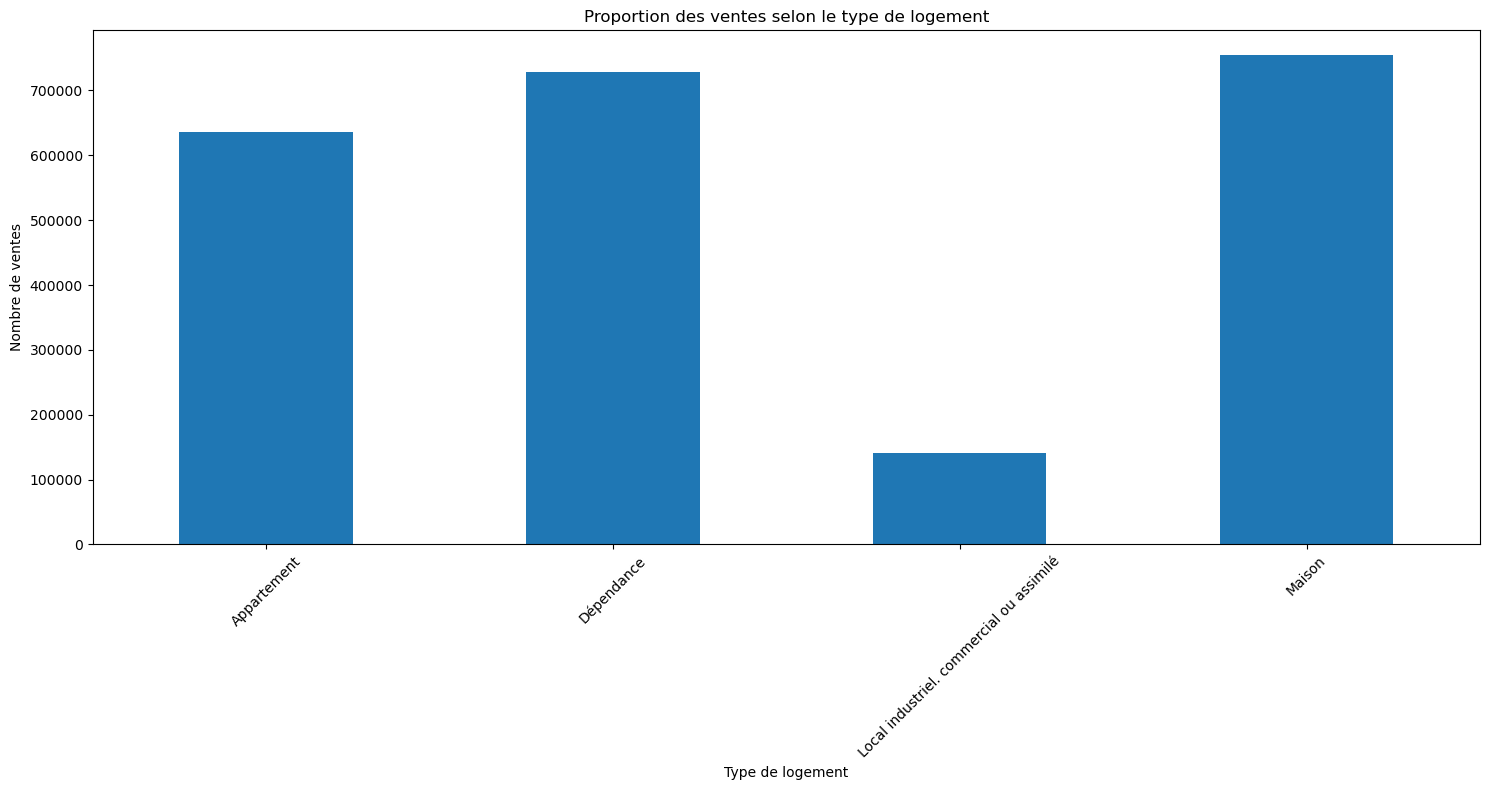

In [64]:
ventes_par_type_logement = data_bien.groupby('Type_local').size()
ventes_par_type_logement.plot(kind='bar', figsize=(15, 8))
plt.title('Proportion des ventes selon le type de logement')
plt.xlabel('Type de logement')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
pd.merge

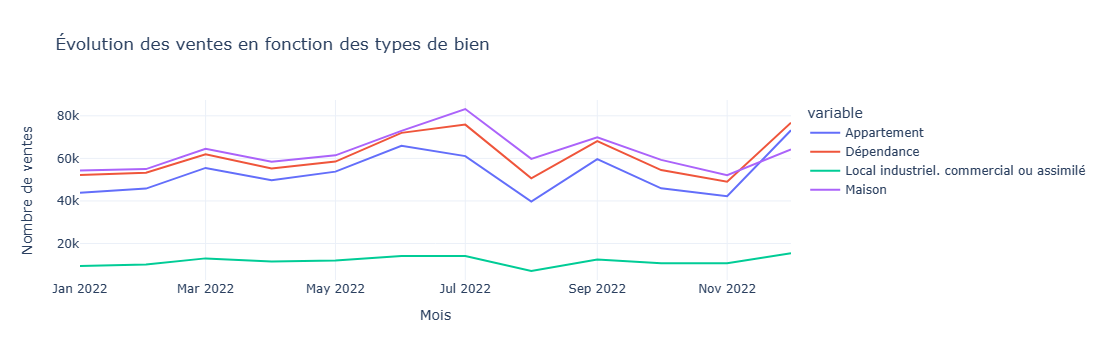

In [74]:
df_vis['Date_mutation'] = pd.to_datetime(df_vis['Date_mutation'], format='%d/%m/%Y')
ventes_par_mois = df_vis.groupby([df_vis['Date_mutation'].dt.strftime('%Y-%m'), 'Type_local']).size().unstack(fill_value=0)
ventes_par_mois.reset_index(inplace=True)
fig = px.line(ventes_par_mois, x='Date_mutation', y=ventes_par_mois.columns[1:], 
              title="Évolution des ventes en fonction des types de bien",
              labels={'value': 'Nombre de ventes', 'Date_mutation': 'Mois'},
              template="plotly_white")
fig.show()